# Project 1: Logistic Regression for Digit Classification


In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import math
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas

# Data Loading
x_train = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)


In [2]:
#Question 1-1

# Initialize lists to store results
accuracy_scores = []
log_losses = []
coefs = []

# Train models with different numbers of iterations
iteration_range = range(1, 41)
for i in iteration_range:
    model = lm.LogisticRegression(max_iter=i, solver='liblinear')
    model.fit(x_train, y_train)
    
    # Calculate accuracy
    train_accuracy = model.score(x_train, y_train)
    accuracy_scores.append(train_accuracy)
    
    # Calculate log loss
    probabilities = model.predict_proba(x_train)
    log_loss = metrics.log_loss(y_train, probabilities)
    log_losses.append(log_loss)
    
    # Store coefficients
    coefs.append(model.coef_)



/Users/mattlantin/anaconda3/envs/ml135_env_sp21/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mattlantin/anaconda3/envs/ml135_env_sp21/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mattlantin/anaconda3/envs/ml135_env_sp21/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mattlantin/anaconda3/envs/ml135_env_sp21/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mattlantin/anaconda3/envs/ml135_env_sp21/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of

In [3]:
# Load test data for the new dataset
x_test_new = np.loadtxt('data_trouser_dress/troudress_test_x.csv', delimiter=',', skiprows=1)

# Predict probabilities for the new test data using the final model
yproba1_test_new = model.predict_proba(x_test_new)[:, 1]

# Save the predicted probabilities to a text file
np.savetxt('yproba1_test.txt', yproba1_test_new)


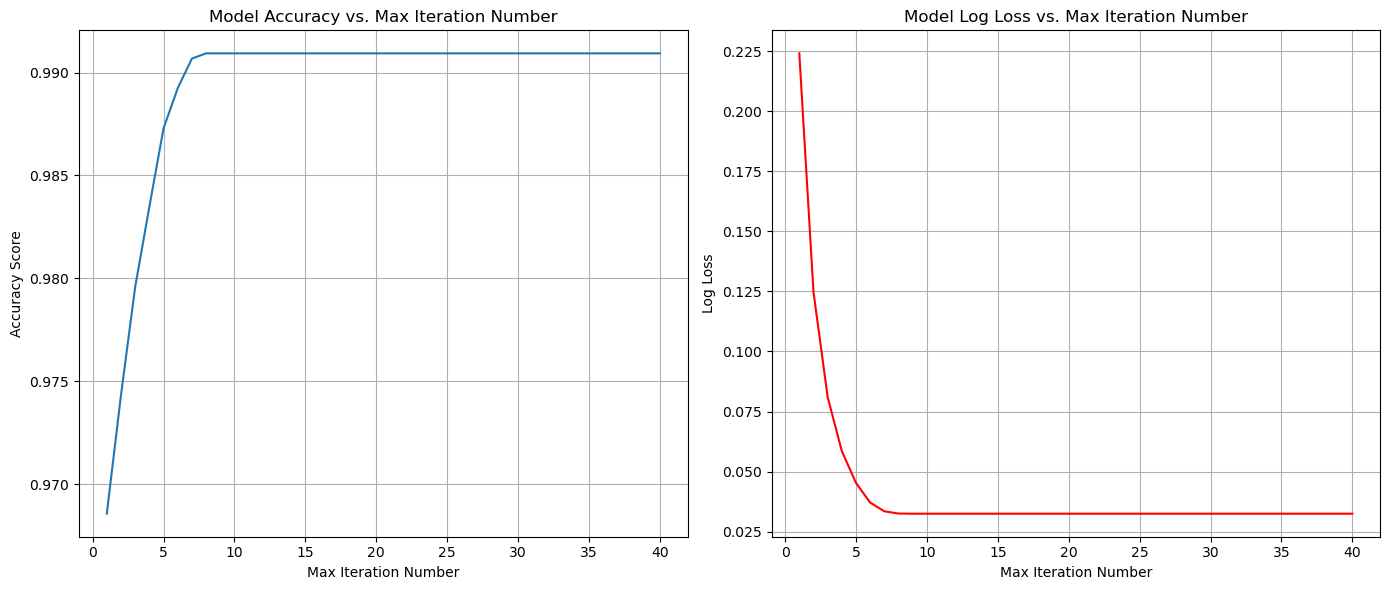

In [4]:
# Plotting
# Create figures for accuracy scores and log losses with proper labeling and titles
plt.figure(figsize=(14, 6))

# Plot for accuracy scores
plt.subplot(1, 2, 1)
plt.plot(iteration_range, accuracy_scores)
plt.title('Model Accuracy vs. Max Iteration Number')
plt.xlabel('Max Iteration Number')
plt.ylabel('Accuracy Score')
plt.grid(True)

# Plot for log losses
plt.subplot(1, 2, 2)
plt.plot(iteration_range, log_losses, color='red')
plt.title('Model Log Loss vs. Max Iteration Number')
plt.xlabel('Max Iteration Number')
plt.ylabel('Log Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

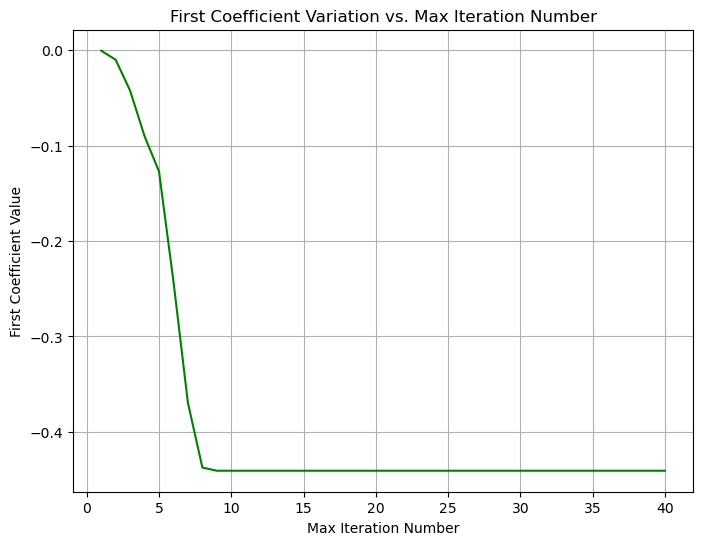

In [5]:
#Question 1-2

# Extract the first coefficient from each set for plotting
first_coef_values = [co[0][0] for co in coefs]

# Plotting the first coefficient changes over different max iteration times
plt.figure(figsize=(8, 6))
plt.plot(iteration_range, first_coef_values,linestyle='-', color='green')
plt.title('First Coefficient Variation vs. Max Iteration Number')
plt.xlabel('Max Iteration Number')
plt.ylabel('First Coefficient Value')
plt.grid(True)
plt.show()

## Model Performance Analysis

In the graphs below, we analyze the model's performance, specifically the variation of the first coefficient across different numbers of maximum iteration settings during the training process.

### Graph Interpretations:

- **Model Accuracy vs. Max Iteration Number**: This graph shows how the accuracy of the model changes as we increase the number of iterations during training. A plateau suggests that further iterations may not yield significant improvements in model accuracy.

- **Model Log Loss vs. Max Iteration Number**: The second graph depicts the log loss of the model against the maximum number of iterations. The sharp decrease and subsequent leveling off imply that the model quickly reaches a point of diminishing returns on further iterations.

- **First Coefficient Variation vs. Max Iteration Number**: The third graph illustrates how the first coefficient (representative of pixel000's influence) decreases in value, becoming more negative with more iterations, suggesting its diminishing importance in the model's decision-making process.


In [6]:
# Question 1-3

# Creating a range of C values for hyperparameter tuning of the logistic regression model
C_values = np.logspace(-9, 6, 31)
train_log_losses = []  # List to store log loss on training data
test_log_losses = []   # List to store log loss on test data
min_test_log_loss = float('inf')  # Initialize to a very high value

# Variables to store the best model's information
best_C = None
best_probabilities = None
best_model = None
best_test_score = None

# Iterating over the range of C values to find the best hyperparameter
for C in C_values:
    current_model = lm.LogisticRegression(C=C, solver='liblinear')
    current_model.fit(x_train, y_train)
    
    # Calculate log loss on the training set
    train_probabilities = current_model.predict_proba(x_train)
    train_loss = metrics.log_loss(y_train, train_probabilities)
    train_log_losses.append(train_loss)
    
    # Calculate log loss on the test set
    test_probabilities = current_model.predict_proba(x_test)
    test_loss = metrics.log_loss(y_test, test_probabilities)
    test_log_losses.append(test_loss)
    
    # Update the best model if the current model has a lower log loss on the test set
    if test_loss < min_test_log_loss:
        min_test_log_loss = test_loss
        best_C = C
        best_probabilities = test_probabilities
        best_model = current_model
        best_test_score = current_model.score(x_test, y_test)

In [7]:
C_values

array([1.00000000e-09, 3.16227766e-09, 1.00000000e-08, 3.16227766e-08,
       1.00000000e-07, 3.16227766e-07, 1.00000000e-06, 3.16227766e-06,
       1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06])

In [8]:
# Printing the best model's log loss, regularization strength C, and accuracy score on the test set
print(f"Least log loss: {min_test_log_loss}, C: {best_C}, Score: {best_test_score}")

Least log loss: 0.08968955642074393, C: 0.03162277660168379, Score: 0.9672213817448311


In [9]:
# Define the function to calculate the confusion matrix for a given threshold
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    # Compute the confusion matrix for a given classifier and threshold
    cm = metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [10]:
# Print the confusion matrix for the best model
print(calc_confusion_matrix_for_threshold(y_test, best_probabilities[:, 1], 0.5))

Predicted    0    1
True               
0          942   32
1           33  976


In [11]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    tp_list = []
    tn_list = []
    fp_list = []
    fn_list = []
    
    index = 0
    for i, j in zip(ytrue_N, yhat_N):
        if (i == 1) & (j == 1):
            TP += 1
            tp_list.append(index)
        elif (i == 0) & (j == 0):
            TN += 1
            tn_list.append(index)
        elif (i == 0) & (j == 1):
            FP += 1
            fp_list.append(index)
        else:
            FN += 1
            fn_list.append(index)
        index = index + 1
#     length = len(ytrue_N)
#     TP /= length
#     TN /= length
#     FP /= length
#     FN /= length
    
    return tp_list, tn_list, fp_list, fn_list

In [12]:
# Define a function to convert linear index to grid indices for a subplot
def get_subplot_grid_indices(linear_idx, grid_size):
    row_index = linear_idx // grid_size
    col_index = linear_idx % grid_size
    if linear_idx % grid_size != 0:
        col_index -= 1
    else:
        row_index -= 1
        col_index = grid_size - 1
    return row_index, col_index


In [13]:
# Convert probabilities to binary predictions based on the threshold of 0.5
predictions_binary = best_probabilities[:, 1] >= 0.5

# Calculate the indices of TP, TN, FP, FN using the binary predictions and true labels
TP_indices, TN_indices, FP_indices, FN_indices = calc_TP_TN_FP_FN(y_test, predictions_binary)

# Convert the test data to a DataFrame for easier manipulation
x_test_df = pd.DataFrame(x_test)

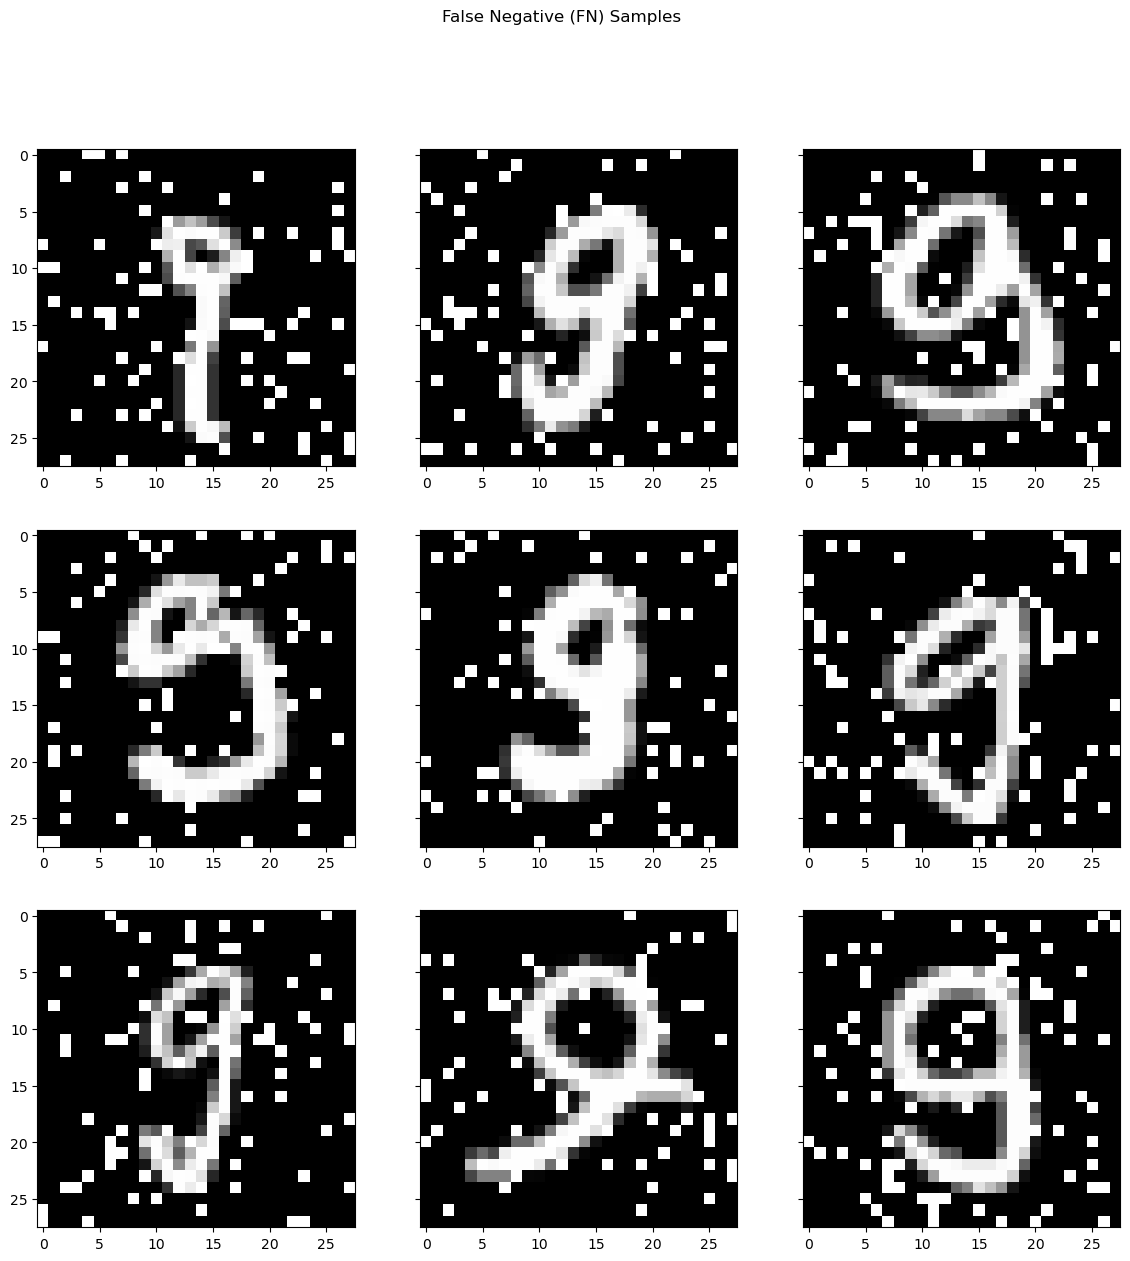

In [14]:
# Plotting the images corresponding to the false negative samples
fig, axs = plt.subplots(3, 3, figsize=(14, 14), sharey=True)
for index in range(9):
    row_idx, col_idx = get_subplot_grid_indices(index, 3)
    digit_image_df = pd.DataFrame(np.array(x_test_df.iloc[FN_indices[index]]).reshape(28, 28))
    axs[row_idx, col_idx].imshow(digit_image_df, cmap='gray', vmin=0.0, vmax=1.0)

fig.suptitle('False Negative (FN) Samples')
plt.show()

In [15]:
predicted_labels =  best_probabilities[:,1]>=0.5


In [16]:
# 1-4
true_positives, true_negatives, false_positives, false_negatives = calc_TP_TN_FP_FN(y_test, predicted_labels)

 

### Understanding Misclassifications between Digits 8 and 9

Initially, the machine is trained to recognize what an 8 looks like. However, due to the resemblance between 8 and 9, coupled with the presence of noise in the data that further blurs the distinction between these two numbers, the machine struggles to accurately differentiate them. As a result, it mistakenly identifies a 9 as an 8. This response is related to the analysis of model performance and misclassification, specifically addressing the challenges faced by the classifier in distinguishing between the digits 8 and 9 within the context of logistic regression for digit classification.

In [17]:
#false positives
false_positives

[37,
 69,
 77,
 101,
 156,
 174,
 219,
 290,
 344,
 352,
 355,
 401,
 440,
 464,
 580,
 712,
 787,
 809,
 896,
 918,
 926,
 948,
 984,
 998,
 1004,
 1068,
 1313,
 1322,
 1327,
 1427,
 1508,
 1672]

In [18]:
def get_grid_indices(linear_idx, grid_size):
    # Calculate the row index by integer division
    row_index = linear_idx // grid_size
    # Calculate the column index as the remainder of the division
    col_index = linear_idx % grid_size
    return row_index, col_index

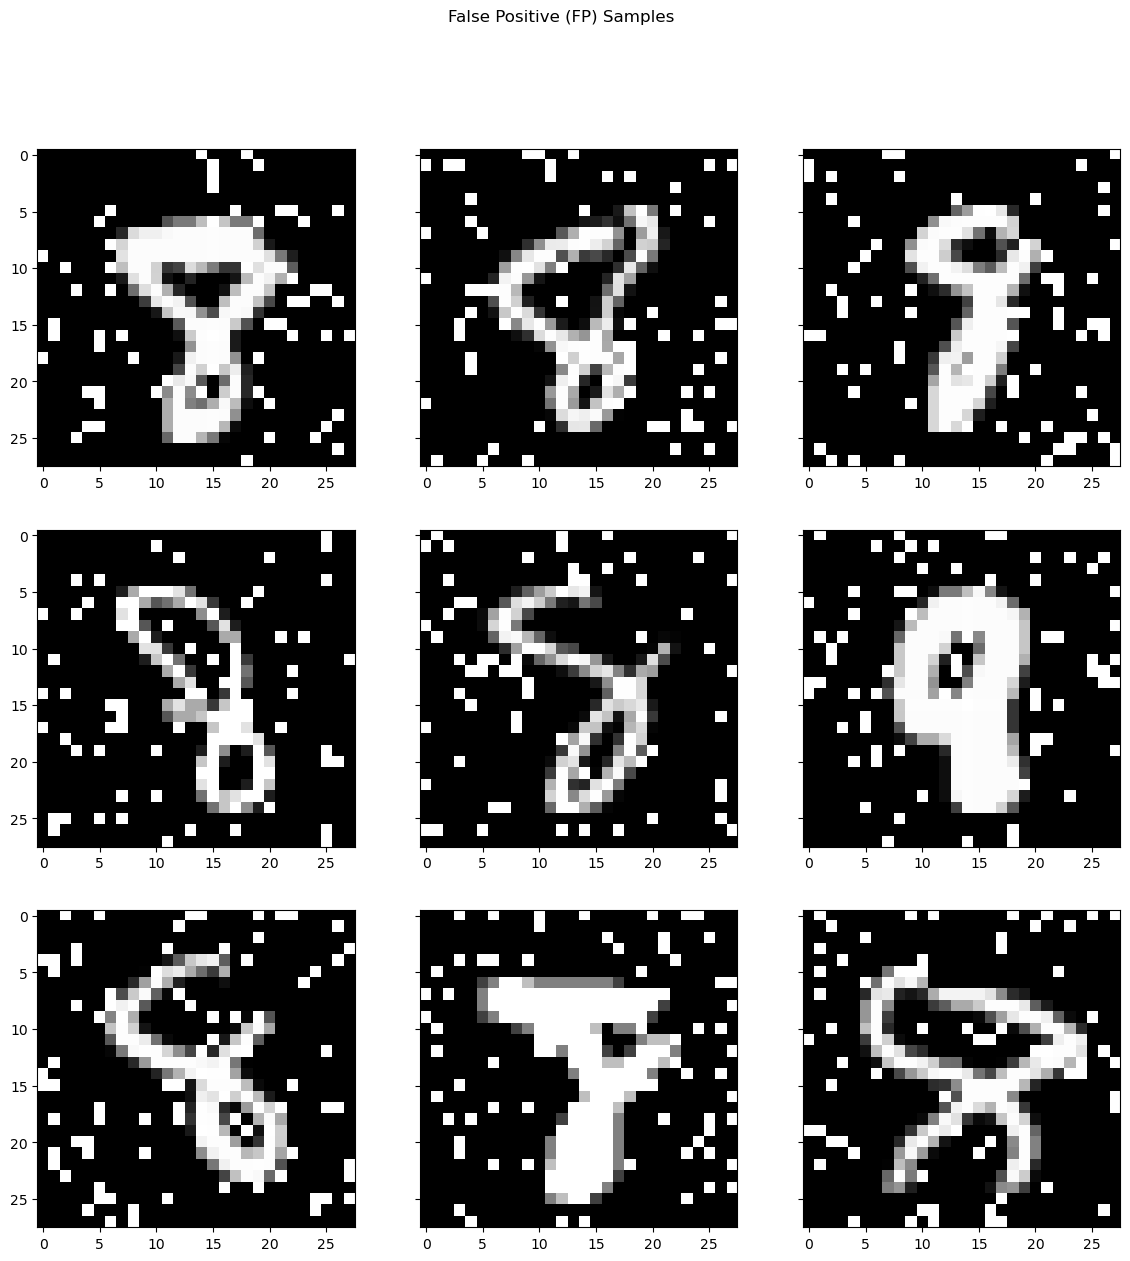

In [24]:

# tpl,tnl,fpl,fnl= calc_TP_TN_FP_FN(y_test, lst)

true_positives, true_negatives, false_positives, false_negatives = calc_TP_TN_FP_FN(y_test, predicted_labels)

# Set up the plot for displaying false positive samples
fig, axis_grid = plt.subplots(3, 3, figsize=(14, 14), sharey=True)

# Loop through the first 9 false positives to display their images
for idx in range(9):
    # Get the subplot indices for a 3x3 grid
    row_index, col_index = get_grid_indices(idx, grid_size=3)
    
    # Extract the 28x28 image data from the flattened array
    image_data = x_test[false_positives[idx]].reshape(28, 28)
    
    # Plot the image in the appropriate subplot
    axis_grid[row_index, col_index].imshow(image_data, cmap='gray', vmin=0.0, vmax=1.0)

# Title for the entire figure
fig.suptitle('False Positive (FP) Samples')
plt.show()

### Analysis
The machine is trained to identify digits 8 and 9, but due to their visual similarity and data noise, it sometimes incorrectly flags digit 8 as a 9—resulting in a false positive. This issue highlights the challenge of distinguishing closely related classes in logistic regression for digit classification.

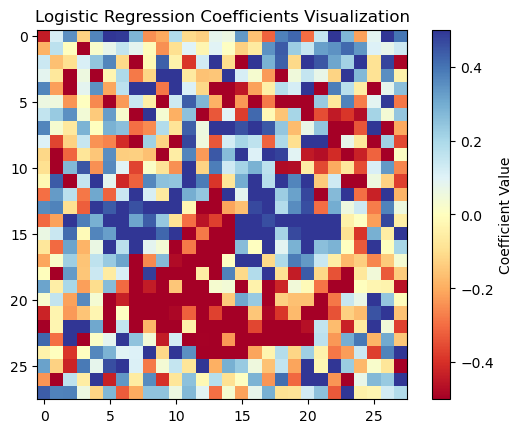

In [20]:
#Question 1-5

# Extract the logistic regression model's coefficients and reshape them into a 28x28 matrix
coefficients_matrix = np.array(model.coef_).reshape(28, 28)

fig, ax = plt.subplots()
# Red indicates negative weights, Blue positive, and Yellow near zero, highlighting areas the model pays most attention to
cmap_visualization = ax.imshow(coefficients_matrix, cmap='RdYlBu', vmin=-0.5, vmax=0.5)


ax.set_title("Logistic Regression Coefficients Visualization")
plt.colorbar(cmap_visualization, ax=ax, label='Coefficient Value')
plt.show()

## Understanding Logistic Regression Coefficient Interpretation

Logistic regression models interpret coefficients associated with pixel intensity in the following manner: areas highlighted in red correspond to negative weights, influencing the model's prediction towards a value below 0.5, which is indicative of the negative class. Conversely, areas marked in blue represent positive weights, pushing the model's prediction above 0.5, thus leaning towards the positive class. It's crucial to note that these predictions are not labeled as 'negative' or 'positive' values themselves but rather guide the model towards classifying an input as belonging to one class or the other based on these weight influences.
